In [34]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pickle
import PIL
import os

In [13]:
batch_size = 32

# 70% Train
train = tf.keras.utils.image_dataset_from_directory(
    "./images",
    validation_split = 0.2,
    subset = "training",
    seed = 1,
    color_mode = "grayscale",
    image_size = (32, 32),
    batch_size = batch_size,
    labels = "inferred"
)

# 30% Validate
val = tf.keras.utils.image_dataset_from_directory(
    "./images",
    validation_split = 0.2,
    subset = "validation",
    seed = 1,
    color_mode = "grayscale",
    image_size = (32, 32),
    batch_size = batch_size,
    labels = "inferred"
)

Found 36000 files belonging to 360 classes.
Using 28800 files for training.
Found 36000 files belonging to 360 classes.
Using 7200 files for validation.


In [46]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Rescaling(1 / 255))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(7, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1024, activation='relu'))
model.add(tf.keras.layers.Dense(360, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [47]:
epochs = 100
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)
fit = model.fit(
    train,
    validation_data=val,
    epochs=epochs,
    verbose=1,
    callbacks = [callback],
    shuffle = True
)

Epoch 1/100


900/900 [==============================] - 173s 189ms/step - loss: 3.9982 - accuracy: 0.1880 - val_loss: 3.2108 - val_accuracy: 0.2797
Epoch 2/100
900/900 [==============================] - 138s 154ms/step - loss: 2.7315 - accuracy: 0.3595 - val_loss: 2.8682 - val_accuracy: 0.3482
Epoch 3/100
900/900 [==============================] - 153s 170ms/step - loss: 2.1752 - accuracy: 0.4516 - val_loss: 2.7627 - val_accuracy: 0.3658
Epoch 4/100
900/900 [==============================] - 152s 169ms/step - loss: 1.7593 - accuracy: 0.5350 - val_loss: 2.8609 - val_accuracy: 0.3735
Epoch 5/100
900/900 [==============================] - 157s 174ms/step - loss: 1.4099 - accuracy: 0.6053 - val_loss: 3.0420 - val_accuracy: 0.3710


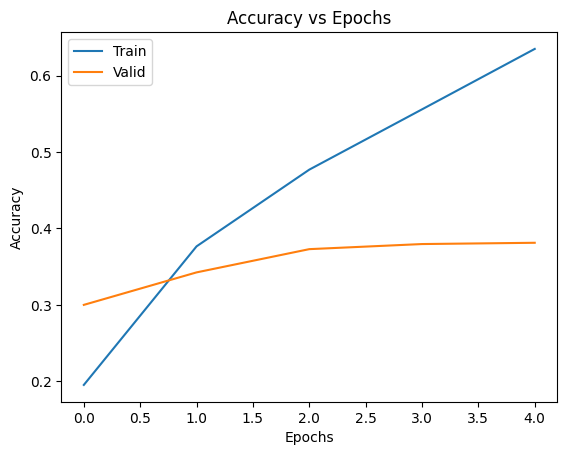

In [40]:
plt.plot(fit.history["accuracy"], label = "Train")
plt.plot(fit.history["val_accuracy"], label = "Valid")
plt.legend()
plt.title("Accuracy vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

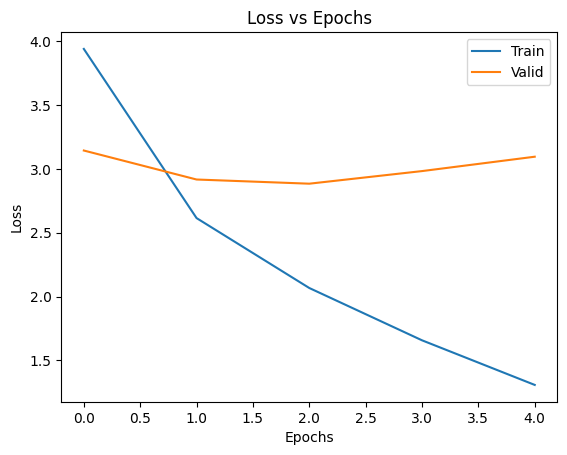

In [41]:
plt.plot(fit.history["loss"], label = "Train")
plt.plot(fit.history["val_loss"], label = "Valid")
plt.legend()
plt.title("Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [42]:
model.save("model_360") # 36.14% Accuracy
model.save("model_360.h5") # 36.14% Accuracy

INFO:tensorflow:Assets written to: model_360\assets


INFO:tensorflow:Assets written to: model_360\assets
c:\Users\andre\anaconda3\envs\TAMU_Datathon\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [54]:
def guess(x: list[int], y: list[int]) -> str:
    plt.figure(figsize = (0.32, 0.32), dpi = 100)
    for i in range(len(x)):
        plt.plot(x[i], y[i], color = "black")
    plt.gca().invert_yaxis()
    plt.grid(False)
    plt.axis("off")
    plt.savefig("test.png")
    plt.clf()
    plt.close()

    model = tf.keras.models.load_model("model_360.h5")
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    img = tf.keras.preprocessing.image.load_img("test.png", grayscale = True)
    test = tf.keras.preprocessing.image.img_to_array(img)
    test = np.expand_dims(test, axis = 0)
    labels = model.predict(test)
    prediction = np.argmax(labels, 1)
    print(prediction)
    return ['accessory',
 'aircraft carrier',
 'airplane',
 'alarm clock',
 'ambulance',
 'angel',
 'animal migration',
 'ant',
 'anvil',
 'apple',
 'arm',
 'asparagus',
 'axe',
 'backpack',
 'banana',
 'bandage',
 'barn',
 'baseball',
 'baseball bat',
 'basket',
 'basketball',
 'bat',
 'bathtub',
 'beach',
 'bear',
 'beard',
 'bed',
 'bee',
 'belt',
 'bench',
 'bicycle',
 'binoculars',
 'bird',
 'birthday cake',
 'blackberry',
 'blueberry',
 'book',
 'boomerang',
 'bottlecap',
 'bowtie',
 'bracelet',
 'brain',
 'bread',
 'bridge',
 'broccoli',
 'broom',
 'bucket',
 'bulldozer',
 'bus',
 'bush',
 'butterfly',
 'cactus',
 'cake',
 'calculator',
 'calendar',
 'camel',
 'camera',
 'camouflage',
 'campfire',
 'candle',
 'cannon',
 'canoe',
 'car',
 'carrot',
 'castle',
 'cat',
 'cats',
 'ceiling fan',
 'cell phone',
 'cello',
 'chair',
 'chandelier',
 'church',
 'circle',
 'clarinet',
 'clock',
 'cloud',
 'coffee cup',
 'compass',
 'computer',
 'construction',
 'cookie',
 'cooler',
 'couch',
 'cow',
 'crab',
 'crayon',
 'crocodile',
 'crown',
 'cruise ship',
 'cup',
 'diamond',
 'dishwasher',
 'diving board',
 'dog',
 'dolphin',
 'donut',
 'door',
 'dragon',
 'dresser',
 'drill',
 'drums',
 'duck',
 'dumbbell',
 'ear',
 'elbow',
 'elephant',
 'envelope',
 'eraser',
 'eye',
 'eyeglasses',
 'face',
 'fan',
 'feather',
 'fence',
 'finger',
 'fire hydrant',
 'fireplace',
 'firetruck',
 'fish',
 'flamingo',
 'flashlight',
 'flip flops',
 'floor lamp',
 'flower',
 'flying saucer',
 'foot',
 'fork',
 'frog',
 'fruit',
 'frying pan',
 'garden',
 'garden hose',
 'giraffe',
 'goatee',
 'golf club',
 'grapes',
 'grass',
 'guitar',
 'hamburger',
 'hammer',
 'hand',
 'harp',
 'hat',
 'headphones',
 'hedgehog',
 'helicopter',
 'helmet',
 'hexagon',
 'hockey puck',
 'hockey stick',
 'horse',
 'hospital',
 'hot air balloon',
 'hot dog',
 'hot tub',
 'hourglass',
 'house',
 'house plant',
 'hurricane',
 'ice cream',
 'instrument',
 'jacket',
 'jail',
 'kangaroo',
 'key',
 'keyboard',
 'knee',
 'knife',
 'ladder',
 'lantern',
 'laptop',
 'leaf',
 'leg',
 'light bulb',
 'lighter',
 'lighthouse',
 'lightning',
 'line',
 'lion',
 'lipstick',
 'lobster',
 'lollipop',
 'mailbox',
 'map',
 'marker',
 'matches',
 'megaphone',
 'mermaid',
 'microphone',
 'microwave',
 'monkey',
 'moon',
 'mosquito',
 'motorbike',
 'mountain',
 'mouse',
 'moustache',
 'mouth',
 'mug',
 'mushroom',
 'nail',
 'necklace',
 'nose',
 'ocean',
 'octagon',
 'octopus',
 'one_liner',
 'onion',
 'oven',
 'owl',
 'paint can',
 'paintbrush',
 'palm tree',
 'panda',
 'pants',
 'paper clip',
 'parachute',
 'parrot',
 'passport',
 'peanut',
 'pear',
 'peas',
 'pencil',
 'penguin',
 'piano',
 'pickup truck',
 'picture frame',
 'pig',
 'pillow',
 'pineapple',
 'pizza',
 'plant',
 'pliers',
 'police car',
 'pond',
 'pool',
 'popsicle',
 'postcard',
 'potato',
 'power outlet',
 'purse',
 'rabbit',
 'raccoon',
 'radio',
 'rain',
 'rainbow',
 'rake',
 'remote control',
 'rhinoceros',
 'rifle',
 'river',
 'roller coaster',
 'rollerskates',
 'sailboat',
 'sandwich',
 'saw',
 'saxophone',
 'school bus',
 'scissors',
 'scorpion',
 'screwdriver',
 'sea turtle',
 'see saw',
 'shape',
 'shark',
 'sheep',
 'shoe',
 'shorts',
 'shovel',
 'sink',
 'skateboard',
 'skull',
 'skyscraper',
 'sleeping bag',
 'smiley face',
 'snail',
 'snake',
 'snorkel',
 'snowflake',
 'snowman',
 'soccer ball',
 'sock',
 'speedboat',
 'spider',
 'spoon',
 'sport',
 'spreadsheet',
 'square',
 'squiggle',
 'squirrel',
 'stairs',
 'star',
 'steak',
 'stereo',
 'stethoscope',
 'stitches',
 'stop sign',
 'stove',
 'strawberry',
 'streetlight',
 'string bean',
 'submarine',
 'suitcase',
 'sun',
 'swan',
 'sweater',
 'swing set',
 'sword',
 'syringe',
 't-shirt',
 'table',
 'teapot',
 'teddy-bear',
 'telephone',
 'television',
 'tennis racquet',
 'tent',
 'terrain',
 'The Eiffel Tower',
 'The Great Wall of China',
 'The Mona Lisa',
 'tiger',
 'toaster',
 'toe',
 'toilet',
 'tool',
 'tooth',
 'toothbrush',
 'toothpaste',
 'tornado',
 'tractor',
 'traffic light',
 'train',
 'tree',
 'triangle',
 'trombone',
 'truck',
 'trumpet',
 'umbrella',
 'underwear',
 'van',
 'vase',
 'vehicle',
 'violin',
 'washing machine',
 'watermelon',
 'waterslide',
 'weapon',
 'weather',
 'whale',
 'wheel',
 'windmill',
 'wine bottle',
 'wine glass',
 'wristwatch',
 'writing_utensil',
 'yoga',
 'zebra',
 'zigzag'][prediction[0]]

In [55]:
with open ("google_500_image_stroke_data", "rb") as file:
    temp = pickle.load(file)
x = []
y = []
for strokes in temp[1][1:][0]:
    xs = strokes[0]
    ys = strokes[1]
    x.append(xs)
    y.append(ys)
print(guess(x, y))

1/1 [==============================] - 0s 184ms/step
[92]
dishwasher
